<a href="https://colab.research.google.com/github/lephuocdat2000/AI/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Khai Báo Thư Viện**

In [3]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set()

**Khai Báo Mô Hình**

In [4]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# K-NN
from sklearn.neighbors import KNeighborsClassifier
# K-Means
from sklearn.cluster import KMeans
# Gausian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# SVM
from sklearn.svm import SVC
%matplotlib inline

**Tải Bộ Dữ Liệu Lên**

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)  #đọc dữ liệu

# Ma Trận Dữ Liệu và 5 Phần Tử Đầu
print(dataset.shape)
print(dataset)
# Mô Tả Dữ Liệu

(150, 5)
     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [6]:
print(dataset.describe())
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


**Phân Tách Bộ Dữ Liệu và Tách Phân Lớp Class Khỏi Nhóm Hoa Iris**

In [7]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

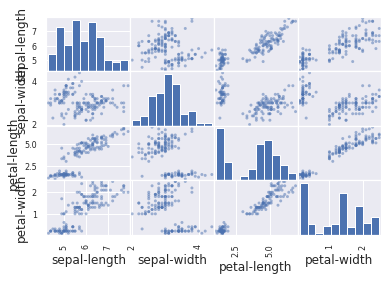

In [8]:
scatter_matrix(dataset)
plt.show()

**Thực Hiện Việc Kiểm Tra Và Đánh Giá Các Mô Hình Lên Hoa Iris**

In [9]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Đánh Giá Mô Hình
results = []
names = []
for name, model in models:
  	cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
  	results.append(cv_results)
  	names.append(name)
  	print(name, cv_results.mean())  #cv_results.mean: trung bình hiệu suất của 10 lần fold

LR 0.95
KNN 0.9583333333333333
RF 0.9333333333333332
DTC 0.9416666666666667
NB 0.9499999999999998
SVM 0.9833333333333332


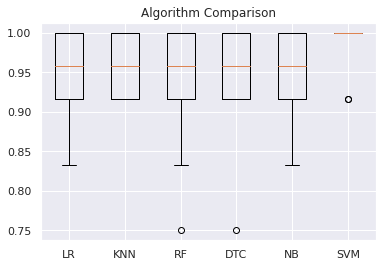

In [10]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Ta thấy rằng đa số các model đều có sự giao động về độ chính xác sau 10 lần gấp chỉ có SVM là luôn đạt độ chính xác ở mức cao nhất => SVM phù hợp với bộ dữ liệu này



---



Tiến hành train model bằng thuật toán SVM

In [11]:
# Kiểm Chứng Dự Đoán Lên Bộ Dữ Liệu Đánh Giá
model = SVC(gamma='auto',)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


accuracy_score: số lượng dự đoán đúng / tổng số mẫu dự đoán


Biểu diễn kết quả dự đoán dưới dạng confusion matrix

Text(89.18, 0.5, 'predicted label')

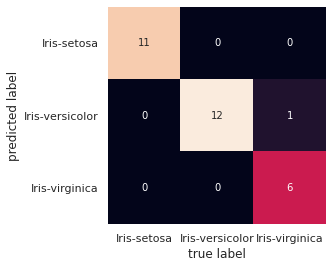

In [12]:
target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
mat=confusion_matrix(Y_validation,predictions)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,xticklabels=target_names,yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Đánh giá f1-score

In [13]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Tuning Hyperparameter sử dụng GridSearchCV do sklearn cung cấp

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid={
             'kernel':['linear','rbf','poly'],
            }
search=GridSearchCV(model,param_grid,n_jobs=-1)
search.fit(X_validation,Y_validation)
search.best_params_

{'kernel': 'linear'}

GridSearch chọn kernel = linear để model đạt hiệu suất tốt nhất

Tiến hành train và đánh lại model với tham số kernel thay đổi

In [15]:
tuning_model = SVC(gamma='auto',kernel='linear')
tuning_model.fit(X_train, Y_train)
predictions = tuning_model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

1.0


In [16]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Hàm dự đoán loại hoa với đầu vào là 4 thông số chiều dài,chiều rộng của cánh hoa và đài hoa

In [17]:
def Predict_Func(x,y,z,t,model=tuning_model,train=X_train):
    arr=[[x,y,z,t]]
    pred=model.predict(arr)
    print("Loai hoa duoc model du doan la: ",pred[0])
    print("Thank you")

In [18]:
Predict_Func(6.6,3.0,4.4,1.4)

Loai hoa duoc model du doan la:  Iris-versicolor
Thank you


In [19]:
X_train

array([[6.1, 3.0, 4.6, 1.4],
       [7.7, 3.0, 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.3, 4.0, 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.0, 5.5, 2.1],
       [5.1, 3.5, 1.4, 0.3],
       [6.0, 2.2, 5.0, 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.0, 3.6, 1.4, 0.2],
       [4.8, 3.0, 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 2.8, 4.8, 1.8],
       [6.0, 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2.0],
       [5.7, 3.0, 4.2, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.5, 5.0, 2.0],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.0, 1.4, 0.1],
       [4.7, 3